<a href="https://colab.research.google.com/github/hvr2026/CMPE-255-Assignment-2-LOW-CODE-ASSIGNMENTS-PART-2---pycaret-low-code-tasks/blob/main/Regression_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 66.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

In [3]:
import pandas as pd

In [5]:
data = pd.read_csv('/content/california_housing.csv')
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
from pycaret.regression import *
s = setup(data, target = 'MedHouseVal', session_id = 149)

,Description,Value
0,Session id,149
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [10]:
from pycaret.regression import RegressionExperiment
xp = RegressionExperiment()

type(xp)

pycaret.regression.oop.RegressionExperiment

In [12]:
xp.setup(data, target = 'MedHouseVal', session_id = 123)

,Description,Value
0,Session id,123
1,Target,MedHouseVal
2,Target type,Regression
3,Original data shape,"(20640, 9)"
4,Transformed data shape,"(20640, 9)"
5,Transformed train set shape,"(14447, 9)"
6,Transformed test set shape,"(6193, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [13]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2967,0.2041,0.4515,0.8462,0.1360,0.1668,6.6430
lightgbm,Light Gradient Boosting Machine,0.3116,0.2200,0.4687,0.8342,0.1420,0.1772,0.9790
xgboost,Extreme Gradient Boosting,0.3186,0.2330,0.4824,0.8243,0.1464,0.1798,0.3920
et,Extra Trees Regressor,0.3347,0.2605,0.5100,0.8037,0.1503,0.1870,4.2210
rf,Random Forest Regressor,0.3337,0.2631,0.5126,0.8019,0.1518,0.1879,11.1540
gbr,Gradient Boosting Regressor,0.3709,0.2885,0.5367,0.7827,0.1635,0.2132,3.2900
br,Bayesian Ridge,0.5339,0.5368,0.7323,0.5959,0.2253,0.3195,0.0280
lr,Linear Regression,0.5339,0.5368,0.7324,0.5958,0.2253,0.3195,0.8300
ridge,Ridge Regression,0.5339,0.5368,0.7323,0.5958,0.2253,0.3195,0.0270
dt,Decision Tree Regressor,0.4706,0.5381,0.7333,0.5943,0.2149,0.2566,0.2590


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [14]:
best = create_model('catboost') # other gradient boosting frameworks -  CatBoost, XGBoost, and LightGBM

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2855,0.2021,0.4495,0.8431,0.1319,0.1563
1,0.2954,0.1995,0.4467,0.8458,0.1396,0.1787
2,0.2957,0.2110,0.4594,0.8337,0.1362,0.1643
3,0.3020,0.2122,0.4606,0.8403,0.1344,0.1598
4,0.3094,0.2164,0.4651,0.8550,0.1376,0.1629
5,0.3079,0.2189,0.4679,0.8284,0.1419,0.1826
6,0.2951,0.1875,0.4330,0.8581,0.1374,0.1711
7,0.2974,0.2083,0.4564,0.8427,0.1361,0.1639
8,0.2814,0.1754,0.4188,0.8775,0.1260,0.1573


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
xp.compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.2987,0.2064,0.4540,0.8446,0.1368,0.1673,6.1660
lightgbm,Light Gradient Boosting Machine,0.3167,0.2248,0.4740,0.8309,0.1432,0.1785,0.9490
xgboost,Extreme Gradient Boosting,0.3178,0.2332,0.4826,0.8244,0.1463,0.1790,0.3350
et,Extra Trees Regressor,0.3325,0.2578,0.5076,0.8063,0.1495,0.1847,3.8310
rf,Random Forest Regressor,0.3379,0.2668,0.5163,0.7995,0.1537,0.1910,11.2800
gbr,Gradient Boosting Regressor,0.3730,0.2891,0.5375,0.7828,0.1635,0.2123,3.2540
dt,Decision Tree Regressor,0.4640,0.5259,0.7246,0.6045,0.2124,0.2512,0.1630
br,Bayesian Ridge,0.5337,0.5339,0.7304,0.5999,0.2246,0.3178,0.0510
lr,Linear Regression,0.5337,0.5339,0.7305,0.5998,0.2246,0.3177,0.0310
ridge,Ridge Regression,0.5337,0.5339,0.7304,0.5998,0.2246,0.3177,0.0270


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

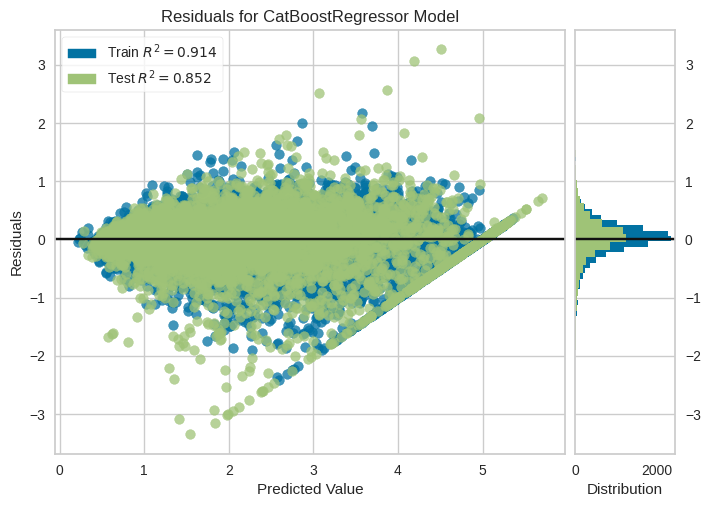

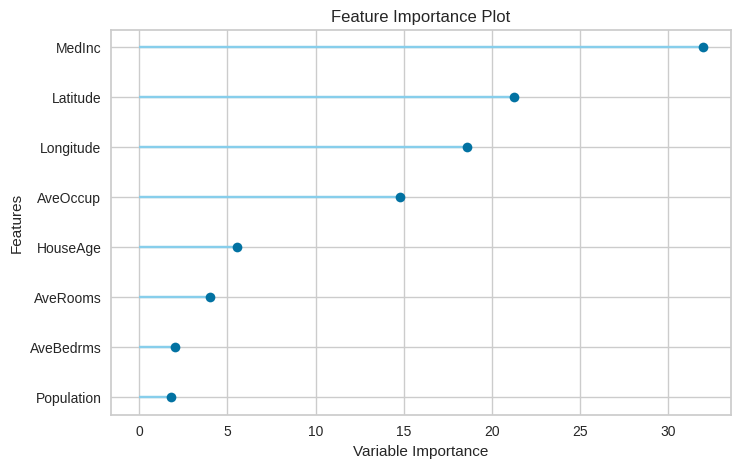

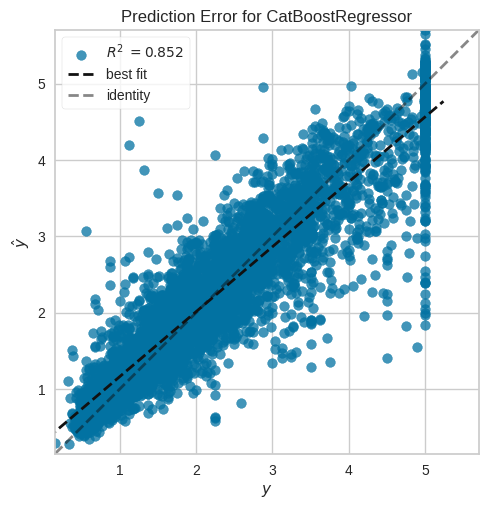

In [17]:
plot_model(best, plot = 'residuals')
plot_model(best, plot = 'feature')
plot_model(best, plot = 'error')

In [18]:

testset_predictions = predict_model(best)
testset_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.2931,0.1970,0.4438,0.8518,0.1336,0.1611


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,prediction_label
6392,8.9728,39.0,7.013201,0.973597,862.0,2.844884,34.139999,-118.050003,5.00001,5.108866
15466,3.7500,16.0,4.936464,0.997238,1446.0,3.994475,33.169998,-117.209999,1.63800,1.614502
7281,1.7929,37.0,3.100890,1.071217,1666.0,4.943620,33.980000,-118.250000,0.97200,1.137455
514,12.3804,52.0,9.122715,1.033943,1192.0,3.112272,37.820000,-122.230003,5.00001,4.782814
1302,4.2647,26.0,5.943463,1.007067,1806.0,3.190813,38.000000,-121.849998,1.33400,1.378984


In [19]:
new_data = data.copy()
new_data.drop('MedHouseVal', axis=1, inplace=True)
new_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:

new_predictions = predict_model(best, data = new_data)
new_predictions.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,prediction_label
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.880001,-122.230003,4.287937
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.860001,-122.220001,3.973434
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.849998,-122.239998,4.142657
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.849998,-122.250000,3.122409
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.849998,-122.250000,2.688797


In [21]:
save_model(best, 'pipeline_two')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MedInc', 'HouseAge', 'AveRooms',
                                              'AveBedrms', 'Population',
                                              'AveOccup', 'Latitude',
                                              'Longitude'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7e0fbfac2e60>)]),
 'pipeline_two.pkl')